### <a id='toc1_1_1_'></a>[Introduce](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Introduce](#toc1_1_1_)    
- [Loading libraries and data](#toc1_1_2_)    
- [Preprocessing data for analysis](#toc1_1_3_)    
- [Desctriptive statistics](#toc1_1_4_)    
- [Stock price of Apple over the years](#toc1_1_5_)    
- [Prediction prices](#toc1_1_6_)    
  - [Linear Regression](#toc1_1_6_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_2_'></a>[Loading libraries and data](#toc0_)

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")

market = pd.read_csv("AAPL Historical Data.csv", decimal=",", parse_dates = ["Date"], index_col = "Date")

### <a id='toc1_1_3_'></a>[Preprocessing data for analysis](#toc0_)

In [202]:
## Market first 10 rows
print(market.head(10))

## Market data frame shape
print(market.shape)

## Market data frame types
print(market.dtypes)

             Price    Open    High     Low    Vol. Change %
Date                                                       
2023-05-01  169.59  169.28  170.45  168.64  49.39M   -0.05%
2023-04-28  169.68  168.49  169.85  167.88  55.28M    0.75%
2023-04-27  168.41  165.19  168.56  165.19  64.22M    2.84%
2023-04-26  163.76  163.05  165.28  162.80  44.11M   -0.01%
2023-04-25  163.77  165.19  166.30  163.73  48.17M   -0.94%
2023-04-24  165.33  165.00  165.60  163.89  38.99M    0.19%
2023-04-21  165.02  165.05  166.45  164.49  58.34M   -0.98%
2023-04-20  166.65  166.09  167.87  165.56  52.46M   -0.58%
2023-04-19  167.63  165.80  168.16  165.54  47.24M    0.70%
2023-04-18  166.47  166.10  167.41  165.65  48.41M    0.75%
(2519, 6)
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [203]:
### Changing col name "Vol." for better view
market = market.rename(columns = {"Vol.":"Vol"})

In [204]:
# Remove all letters in dataframe using regular expression expect dots.
market[["Price", "Open", "High", "Low"]] = market[["Price", "Open", "High", "Low"]].replace('[^0-9\.]+', '', regex=True)
## Unit M means milion

### Drop also change%
market = market.drop(columns = "Change %")

In [205]:
# Checking for missing values
print(market.isnull().sum().sort_values(ascending=False))

Vol      1
Price    0
Open     0
High     0
Low      0
dtype: int64


In [206]:
# Drop missing value
print(market[market["Vol"].isnull()])
market = market.dropna()

            Price   Open   High    Low  Vol
Date                                       
2016-02-27  96.95  96.95  96.95  96.95  NaN


In [207]:
print(market.isna().any())

Price    False
Open     False
High     False
Low      False
Vol      False
dtype: bool


In [208]:
print(market.head(10))

             Price    Open    High     Low     Vol
Date                                              
2023-05-01  169.59  169.28  170.45  168.64  49.39M
2023-04-28  169.68  168.49  169.85  167.88  55.28M
2023-04-27  168.41  165.19  168.56  165.19  64.22M
2023-04-26  163.76  163.05  165.28  162.80  44.11M
2023-04-25  163.77  165.19  166.30  163.73  48.17M
2023-04-24  165.33  165.00  165.60  163.89  38.99M
2023-04-21  165.02  165.05  166.45  164.49  58.34M
2023-04-20  166.65  166.09  167.87  165.56  52.46M
2023-04-19  167.63  165.80  168.16  165.54  47.24M
2023-04-18  166.47  166.10  167.41  165.65  48.41M


In [209]:
# Convert data 
market[["Price", "Open", "High", "Low"]] = market[["Price", "Open", "High", "Low"]].astype(float)
print(market.info())
print(market.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2023-05-01 to 2013-05-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2518 non-null   float64
 1   Open    2518 non-null   float64
 2   High    2518 non-null   float64
 3   Low     2518 non-null   float64
 4   Vol     2518 non-null   object 
dtypes: float64(4), object(1)
memory usage: 118.0+ KB
None
             Price    Open    High     Low     Vol
Date                                              
2023-05-01  169.59  169.28  170.45  168.64  49.39M
2023-04-28  169.68  168.49  169.85  167.88  55.28M
2023-04-27  168.41  165.19  168.56  165.19  64.22M
2023-04-26  163.76  163.05  165.28  162.80  44.11M
2023-04-25  163.77  165.19  166.30  163.73  48.17M


### <a id='toc1_1_4_'></a>[Desctriptive statistics](#toc0_)

In [210]:
print(round(market.describe(),2))

         Price     Open     High      Low
count  2518.00  2518.00  2518.00  2518.00
mean     66.83    66.78    67.54    66.06
std      50.48    50.43    51.09    49.81
min      14.06    13.98    14.30    13.89
25%      27.86    27.84    28.09    27.46
50%      43.26    43.30    43.70    42.96
75%     118.68   118.70   120.26   116.72
max     182.01   182.63   182.94   179.12


### <a id='toc1_1_5_'></a>[Stock price of Apple over the years](#toc0_)

Text(0.5, 1.0, 'Stock Price of Apple over the Years')

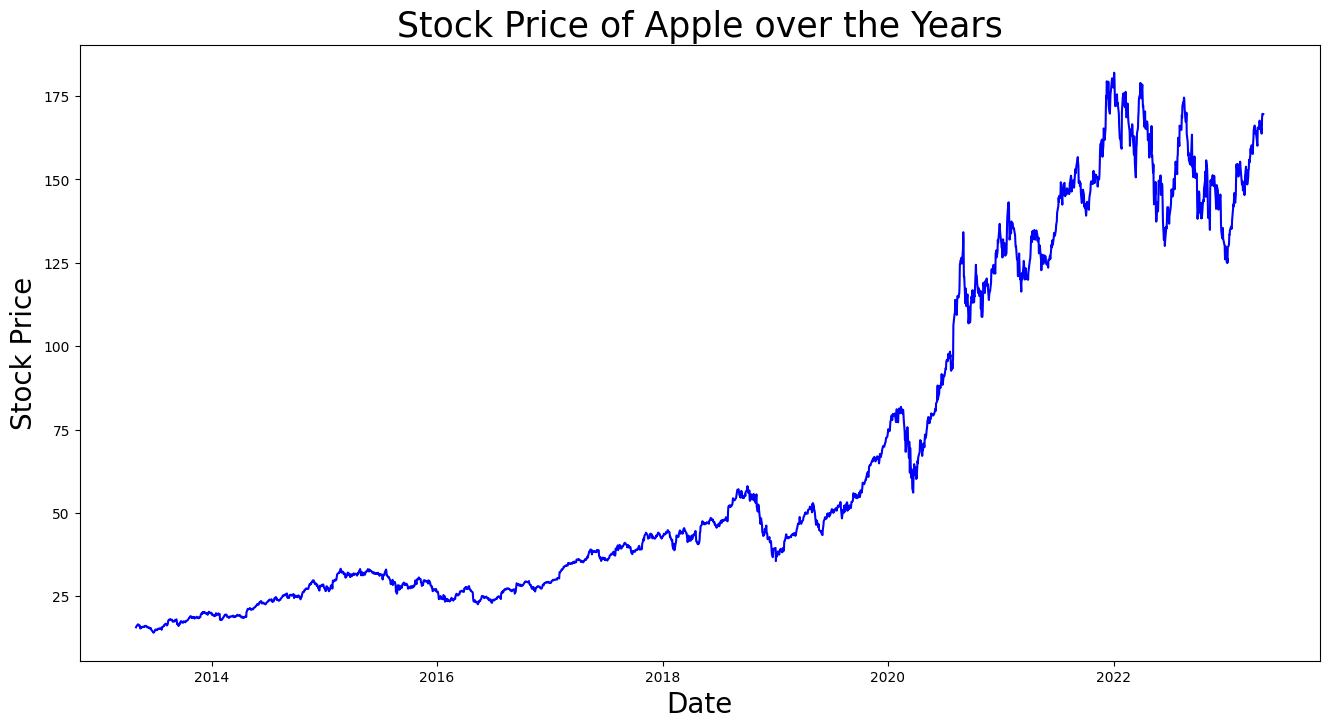

In [211]:

plt.figure(figsize=(16,8))
plt.plot(market["Price"], color="b")
plt.xlabel("Date",size=20)
plt.ylabel("Stock Price",size=20)
plt.title("Stock Price of Apple over the Years",size=25)


### <a id='toc1_1_6_'></a>[Prediction prices](#toc0_)

In [ ]:
market = market.reset_index()
print(market)


           Date   Price    Open    High     Low      Vol
0    2023-05-01  169.59  169.28  170.45  168.64   49.39M
1    2023-04-28  169.68  168.49  169.85  167.88   55.28M
2    2023-04-27  168.41  165.19  168.56  165.19   64.22M
3    2023-04-26  163.76  163.05  165.28  162.80   44.11M
4    2023-04-25  163.77  165.19  166.30  163.73   48.17M
...         ...     ...     ...     ...     ...      ...
2513 2013-05-07   16.38   16.61   16.63   16.20  483.75M
2514 2013-05-06   16.45   16.28   16.51   16.23  496.64M
2515 2013-05-03   16.07   16.12   16.19   16.04  361.53M
2516 2013-05-02   15.91   15.78   16.02   15.74  422.03M
2517 2013-05-01   15.69   15.87   15.89   15.51  507.16M

[2518 rows x 6 columns]


#### <a id='toc1_1_6_1_'></a>[Linear Regression](#toc0_)

(1762,) (756,) (1762,) (756,)


(15826.0, 19475.0)

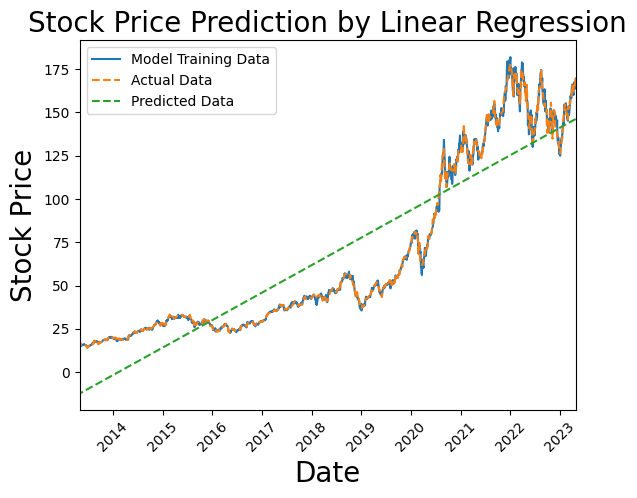

In [ ]:
# Splitting the cols
X = market["Date"] 
y = market["Price"]

# Splitting data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

# Checking shapes
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape) 

# Add to new data frames
df_train = {"Date":train_X, "Price":train_y}
df_train = pd.DataFrame(df_train)

df_test = {"Date":test_X, "Price":test_y}
df_test = pd.DataFrame(df_test)


# To maths representive calendar
train_X = train_X.map(dt.datetime.toordinal)
test_X = test_X.map(dt.datetime.toordinal)

# Model fitting
model = LinearRegression()
model.fit(np.array(train_X).reshape(-1,1), train_y)

# Model predict
preds = model.predict(np.array(test_X).reshape(-1,1))

# Assigning prediction
df_test["Predictions"] = preds

# Setting indexes
df_train.index = df_train["Date"]
df_test.index = df_test["Date"]

# Drop unnecessary columns
df_train = df_train.drop(columns = "Date")
df_test = df_test.drop(columns= "Date")

# Sorting by dates
df_train = df_train.sort_values("Date", ascending=False)
df_test = df_test.sort_values("Date", ascending = False)

# Plot
plt.plot(df_train["Price"])
plt.plot(df_test[["Price", "Predictions"]], linestyle = "--")
plt.xlabel("Date",size=20)
plt.ylabel("Stock Price",size=20)
plt.title("Stock Price Prediction by Linear Regression",size=20)
plt.legend(["Model Training Data","Actual Data","Predicted Data"])
plt.xticks(rotation = 45)
plt.xlim(df_train.index.min(), df_test.index.max())

#### Metrics of linear regression and conclusions

In [ ]:
# Metrics

mse = mean_squared_error(test_y, preds)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, preds)

print(100*"-")
print("\n") 
print(f'Mean Squared Error: {mse}')
print("\n")
print(100*"-")
print("\n")
print(f'Root Mean Squared Error: {rmse}')
print("\n")
print(100*"-")
print("\n")
print(f'R^2: {r2}')
print("\n")
print(100*"-")


----------------------------------------------------------------------------------------------------


Mean Squared Error: 480.07777235350966


----------------------------------------------------------------------------------------------------


Root Mean Squared Error: 21.91067713133279


----------------------------------------------------------------------------------------------------


R^2: 0.8094782065183178


----------------------------------------------------------------------------------------------------


MSE
RMSE
R^2

#### K-nearest neigbors (KNN) ŹLE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


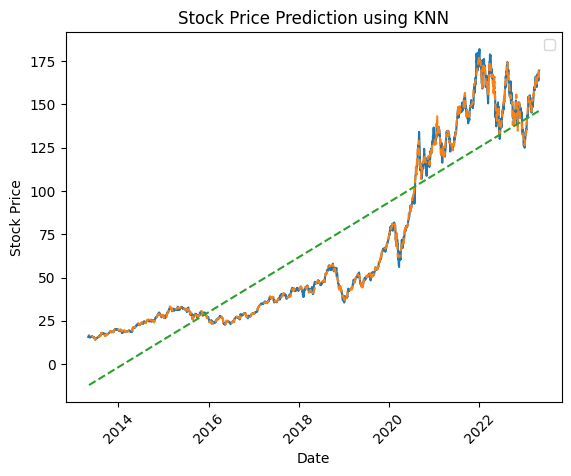

In [ ]:
# Create the KNN model and specify the number of neighbors (k)
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(np.array(train_X).reshape(-1,1), train_y)

# Generate predictions on the testing data
preds_knn = knn.predict(np.array(test_X).reshape(-1,1))

# Assigning prediction
df_test["Predictions_knn"] = preds_knn

# Setting indexes
df_train.index = df_train["Date"]
df_test.index = df_test["Date"]

# Drop unnecessary columns
df_train = df_train.drop(columns = "Date")
df_test = df_test.drop(columns= "Date")

# Sorting by dates
df_train = df_train.sort_values("Date", ascending=False)
df_test = df_test.sort_values("Date", ascending = False)

# Plot the actual prices and the predicted prices
#plt.plot label="Actual Prices")
plt.plot(df_train["Price"])
plt.plot(df_test[["Price", "Predictions_knn"]], linestyle = "--")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction using KNN")
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()


#### Metrics of K-nearest neighbors and conclusion

#### Arima

In [ ]:
df_train
df_test

# Model Arima
train = df_train["Price"]
test = df_test["Price"]

#model_ar = auto_arima(train, start_p=1, start_q=1,max_p=3, \
                      #max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',\
                      #suppress_warnings=True)

# Model fitting
#model_ar.fit(train)
